### Load the combined adata from `02_combine_all_datasets.py` and make sure that all of the metadata is consistent

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import anndata as ad
from collections import Counter
import seaborn as sns

In [2]:
%%time
adata = sc.read_h5ad("02_combined_all_snRNA.h5ad")
adata

CPU times: user 12.3 s, sys: 1min 16s, total: 1min 28s
Wall time: 1min 28s


AnnData object with n_obs × n_vars = 2923936 × 16115
    obs: 'age', 'donor_id', 'sex', 'region', 'cell_type', 'disease', 'consistent_cell_type', 'study', 'technology', 'cell_or_nuclei', 'barcode', 'sample_id', 'age_status'
    layers: 'counts'

### Check metadata

In [4]:
cell_level_metadata = adata.obs

### Make the study names consistent

In [5]:
Counter(cell_level_metadata.study)

Counter({'ENCODE v4 (Snyder)': 883347,
         'Chaffin 2022': 591161,
         'Reichart 2022': 456757,
         'Penn': 219120,
         'Koenig 2022': 217552,
         'Kuppe 2022': 181446,
         'Hill 2022': 112443,
         'Simonson 2023': 99049,
         'Litvinukova 2020': 88413,
         'Sim 2021': 42991,
         'Kanemaru 2023': 31657})

Confirm that this is all nuclei data

In [6]:
Counter(cell_level_metadata.cell_or_nuclei)

Counter({'Nuclei': 2923936})

The majority of the cells are left ventricle, except for the fetal cells

In [7]:
Counter(cell_level_metadata.region)

Counter({'LV': 2816852,
         'WH': 74029,
         'OFT': 14613,
         'Atria': 14423,
         'LRV': 4019})

In [8]:
Counter(cell_level_metadata.sex)

Counter({'male': 1824513, 'female': 1099423})

In [9]:
Counter(cell_level_metadata.disease)

Counter({'ND': 1758433,
         'DCM': 580093,
         'HCM': 234347,
         'AMI': 97848,
         'pediatric HF': 95051,
         'ICM': 81291,
         'ARVC': 69639,
         'NCCM': 7234})

In [10]:
Counter(cell_level_metadata.technology)

Counter({'3prime-v3': 1492811,
         'Multiome-v1': 915004,
         'Dropseq': 219120,
         '5prime-v1': 217552,
         '3prime-v1': 42991,
         '3prime-v2': 36458})

In [11]:
Counter(cell_level_metadata.consistent_cell_type)

Counter({'Cardiomyocyte': 1120289,
         'Fibroblast': 579196,
         'Endothelial': 432834,
         'Pericyte': 321602,
         'Myeloid': 259442,
         'Lymphoid': 71406,
         'Endocardial': 30145,
         'vSMC': 28990,
         'Neuronal': 27629,
         'Adipocyte': 12650,
         'Unclear': 12081,
         'LEC': 11204,
         'Mast': 10728,
         'Epicardial': 5740})

### To prevent the donor_id across studies from being duplicated across studies, add the study to the donor_id

In [12]:
adata.obs['donor_id'] = adata.obs['study'].astype(str) + ":" + adata.obs['donor_id'].astype(str) 

In [13]:
Counter(adata.obs['donor_id'])

Counter({'Penn:Penn_F1': 28086,
         'Penn:Penn_F2': 25610,
         'ENCODE v4 (Snyder):ENCSR273JWD': 25423,
         'ENCODE v4 (Snyder):ENCSR138JCM': 24650,
         'Kuppe 2022:P9': 24407,
         'ENCODE v4 (Snyder):ENCSR237HWJ': 24073,
         'Chaffin 2022:P1358': 23960,
         'ENCODE v4 (Snyder):ENCSR204RHR': 23568,
         'ENCODE v4 (Snyder):ENCSR753YOZ': 23318,
         'Chaffin 2022:P1422': 23282,
         'Kuppe 2022:P2': 23128,
         'ENCODE v4 (Snyder):ENCSR994VEG': 22883,
         'Hill 2022:P86': 21846,
         'Chaffin 2022:P1462': 21693,
         'ENCODE v4 (Snyder):ENCSR002SMQ': 21660,
         'Chaffin 2022:P1437': 21637,
         'ENCODE v4 (Snyder):ENCSR328GTN': 21579,
         'Chaffin 2022:P1722': 21411,
         'ENCODE v4 (Snyder):ENCSR485GOL': 21389,
         'ENCODE v4 (Snyder):ENCSR906MRL': 21387,
         'ENCODE v4 (Snyder):ENCSR630LZS': 21299,
         'ENCODE v4 (Snyder):ENCSR489URW': 21040,
         'Kuppe 2022:P3': 20671,
         'Chaf

### Visualize information about the datasets

In [14]:
donor_information = ( adata.obs.reset_index(drop = True)[["sex", "donor_id", "age", "study", "technology",
                                                          "age_status"]]
                     .drop_duplicates()
                     .reset_index(drop = True) )
donor_information

,sex,donor_id,age,study,technology,age_status
0,female,Penn:Penn_F1,18.0,Penn,Dropseq,fetal
1,male,Penn:Penn_F2,18.0,Penn,Dropseq,fetal
2,male,ENCODE v4 (Snyder):ENCFF802AQC,13.0,ENCODE v4 (Snyder),Multiome-v1,fetal
3,male,ENCODE v4 (Snyder):ENCFF248EWR,15.0,ENCODE v4 (Snyder),Multiome-v1,fetal
4,female,ENCODE v4 (Snyder):ENCFF849ALE,16.0,ENCODE v4 (Snyder),Multiome-v1,fetal
...,...,...,...,...,...,...
294,male,Sim 2021:GSM4742862_Young3_processed,14.0,Sim 2021,3prime-v1,postnatal
295,male,Sim 2021:GSM4742860_Young1_processed,4.0,Sim 2021,3prime-v1,postnatal
296,male,Sim 2021:GSM4742856_Adult3_processed,42.0,Sim 2021,3prime-v1,postnatal
297,female,Sim 2021:GSM4742854_Adult1_processed,35.0,Sim 2021,3prime-v1,postnatal


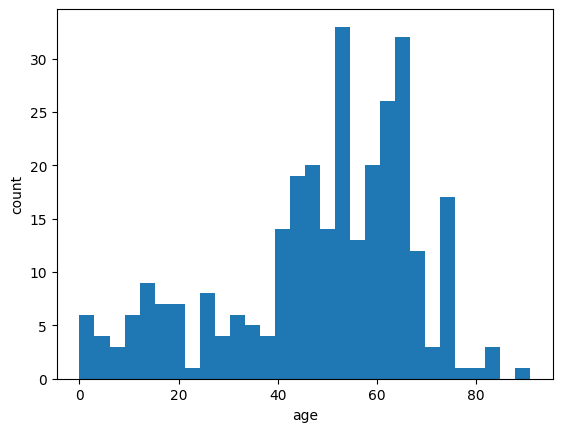

In [16]:
plt.hist(donor_information['age'], bins = 30)
plt.xlabel("age")
plt.ylabel("count")
plt.show()

/home/william/anaconda3/envs/r-kernel/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/william/anaconda3/envs/r-kernel/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/william/anaconda3/envs/r-kernel/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


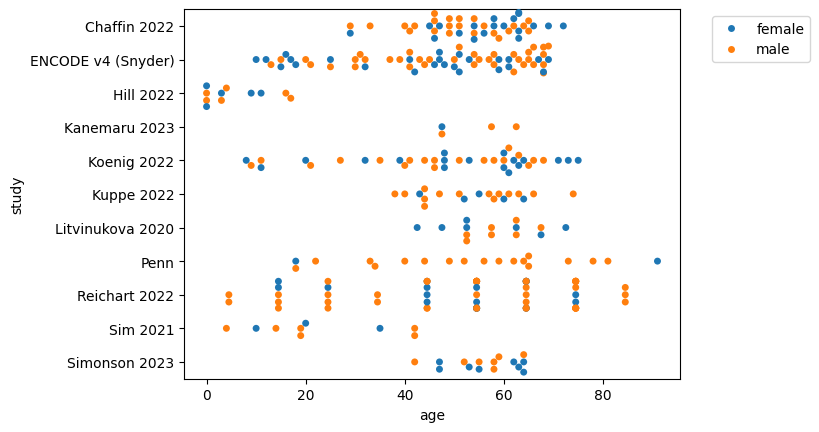

In [17]:
sns.swarmplot(data = donor_information, x='age', y='study', hue = 'sex', alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#### Add metadata

- tech_plus_study
- disease_binary
- age_group
- decade

In [18]:
adata.obs['tech_plus_study'] = adata.obs['technology'].astype(str) + "_" + adata.obs['study'].astype(str)

In [19]:
adata.obs['disease_binary'] = np.where(adata.obs['disease'] == "ND", "N", "Y")

In [20]:
adata.obs['decade'] = np.floor(adata.obs['age'])

In [21]:
Counter(adata.obs['disease_binary'])

Counter({'N': 1758433, 'Y': 1165503})

In [22]:
def get_age_group(age):
    '''
    Add age group to categorize age into three discrete categories based on the decade of donor
    '''
    if age < 40:
        age_group = "young"
    elif (age >= 40) & (age < 60):
        age_group = "middle"
    elif (age >= 60):
        age_group = "old"
    return(age_group)

In [23]:
adata.obs['age_group'] = adata.obs['age'].apply(lambda x: get_age_group(x))

# set fetal as an age group
adata.obs.loc[adata.obs.age_status == "fetal", 'age_group'] = "fetal"

In [24]:
Counter(adata.obs.age_group)

Counter({'middle': 1336871, 'old': 925757, 'young': 511147, 'fetal': 150161})

In [25]:
# set the adata.X as the raw counts
adata.layers['counts'] = adata.X

In [26]:
adata.obs.head()

,age,donor_id,sex,region,cell_type,disease,consistent_cell_type,study,technology,cell_or_nuclei,barcode,sample_id,age_status,tech_plus_study,disease_binary,decade,age_group
Fetal-1st-LV-0315-2-run1n2:AAAAAAACTGGC,18.0,Penn:Penn_F1,female,LV,Cardiomyocyte,ND,Cardiomyocyte,Penn,Dropseq,Nuclei,AAAAAAACTGGC,Fetal-1st-LV-0315-2-run1n2,fetal,Dropseq_Penn,N,18.0,fetal
Fetal-1st-LV-0315-2-run1n2:AAAAAAGCCCCT,18.0,Penn:Penn_F1,female,LV,Cardiomyocyte,ND,Cardiomyocyte,Penn,Dropseq,Nuclei,AAAAAAGCCCCT,Fetal-1st-LV-0315-2-run1n2,fetal,Dropseq_Penn,N,18.0,fetal
Fetal-1st-LV-0315-2-run1n2:AAAAAAGGGCGG,18.0,Penn:Penn_F1,female,LV,Cardiomyocyte,ND,Cardiomyocyte,Penn,Dropseq,Nuclei,AAAAAAGGGCGG,Fetal-1st-LV-0315-2-run1n2,fetal,Dropseq_Penn,N,18.0,fetal
Fetal-1st-LV-0315-2-run1n2:AAAAAGAAATCC,18.0,Penn:Penn_F1,female,LV,Cardiomyocyte,ND,Cardiomyocyte,Penn,Dropseq,Nuclei,AAAAAGAAATCC,Fetal-1st-LV-0315-2-run1n2,fetal,Dropseq_Penn,N,18.0,fetal
Fetal-1st-LV-0315-2-run1n2:AAAAAGACTCTT,18.0,Penn:Penn_F1,female,LV,Endothelial,ND,Endothelial,Penn,Dropseq,Nuclei,AAAAAGACTCTT,Fetal-1st-LV-0315-2-run1n2,fetal,Dropseq_Penn,N,18.0,fetal


In [27]:
%%time
adata.write("03_combined_all_snRNA.h5ad")

CPU times: user 33.3 s, sys: 1min 36s, total: 2min 10s
Wall time: 2min 16s
